In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [1]:
def parse_header(file_path):
    header_info = {}
    with open(file_path, 'r') as file:
        in_header = False
        for line in file:
            line = line.strip()
            if line == '[Header]':
                in_header = True
                continue
            elif line == '[Data]':
                break
            
            if in_header and line:
                parts = line.split(',', 1)
                key = parts[0].strip()
                value = parts[1].strip() if len(parts) > 1 else ''
                header_info[key] = value
    return header_info

In [15]:
def read_data(file_path):
    with open(file_path, 'r') as file:
        in_data = False
        for line in file:
            if line.strip() == '[Data]':
                in_data = True
                continue
            if in_data:
                # First line after [Data] contains column names
                columns = line.strip().split(',')
                # Use pandas to read the CSV data, specifying the column names
                df = pd.read_csv(file, names=columns, index_col=False)
                return df

In [37]:
# Specify the file path
current_dir = os.getcwd()
file_name = 'CH1 YBCO_LAO CH2 YBCO_STO CH3 1000SIOLOW ENERGY_STO .dat'
file_path = os.path.join(current_dir,file_name)

# Parse the header
header_info = parse_header(file_path)

# Read the data
data_df = read_data(file_path)


In [20]:
print(len(data_df))

311


In [29]:
rs = data_df["Bridge 1 Resistivity (Ohm-m)"]
ts = data_df["Temperature (K)"]
sc_index = None
for i in range(len(rs)):
  if rs[i]<1e-3:
    sc_index = i
    break
tc = ts[sc_index]
print(f"Critical temperautre: {tc}")


Critical temperautre: 87.6440505981445


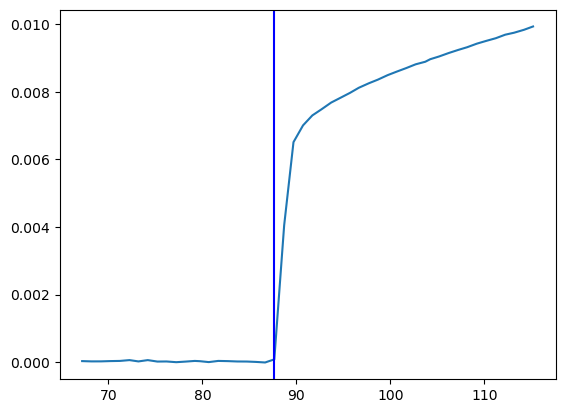

In [31]:
plt.plot(data_df["Temperature (K)"][200:250], data_df["Bridge 1 Resistivity (Ohm-m)"][200:250])
plt.axvline(x = tc, color = 'b', label = 'superconducting temperature')